In [47]:
#import required library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as mplt
import sklearn as sklearn

In [59]:
#with above sklearn library we will divide our dataset into test and train sets
from sklearn.model_selection import train_test_split

#as per our problem statement, we have to find or predict the people who can be diabetic in future, 
#so in this case Either a person will be diabetic Or He/She will be not, 
#ITS A True/False , Yes/No scenerio
#So, here we can use Logistic Regression
from sklearn.linear_model import LogisticRegression

#tranformation applied to data before it is consumed by the algorithm itself 
#because its right now in raw format and containd missing or wrong values, outliers etc etc...
from sklearn import preprocessing


In [68]:
#lets read the flat file and see what we have got in it
database = pd.read_csv(
    'https://raw.githubusercontent.com/parulbedi/pima/main/pima-indians-diabetes.csv', 
    names=['pregnant','glucose','Diastolic','skin','insulin','BMI','pedifunction','age','tagged']
)

In [70]:
database.head()

,pregnant,glucose,Diastolic,skin,insulin,BMI,pedifunction,age,tagged
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [71]:
database.shape

(768, 9)

In [72]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pregnant      768 non-null    int64  
 1   glucose       768 non-null    int64  
 2   Diastolic     768 non-null    int64  
 3   skin          768 non-null    int64  
 4   insulin       768 non-null    int64  
 5   BMI           768 non-null    float64
 6   pedifunction  768 non-null    float64
 7   age           768 non-null    int64  
 8   tagged        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [73]:
database.describe()

,pregnant,glucose,Diastolic,skin,insulin,BMI,pedifunction,age,tagged
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [74]:
#converting column data from any string value to number if there is any string in dataframe
convert_column = ['pregnant','glucose','Diastolic','skin','insulin','BMI','pedifunction','age']
for col in convert_column:
    database[col] = pd.to_numeric(database[col])

In [76]:
#now we will select feastures with which we can predict or 
#determine whether a person is suffering from diabetes or not
feature_column = ['pregnant','glucose','Diastolic','skin','insulin','BMI','pedifunction','age']
X = database[feature_column]
y = database.tagged

Text(493.8000000000002, 0.5, 'y axis')

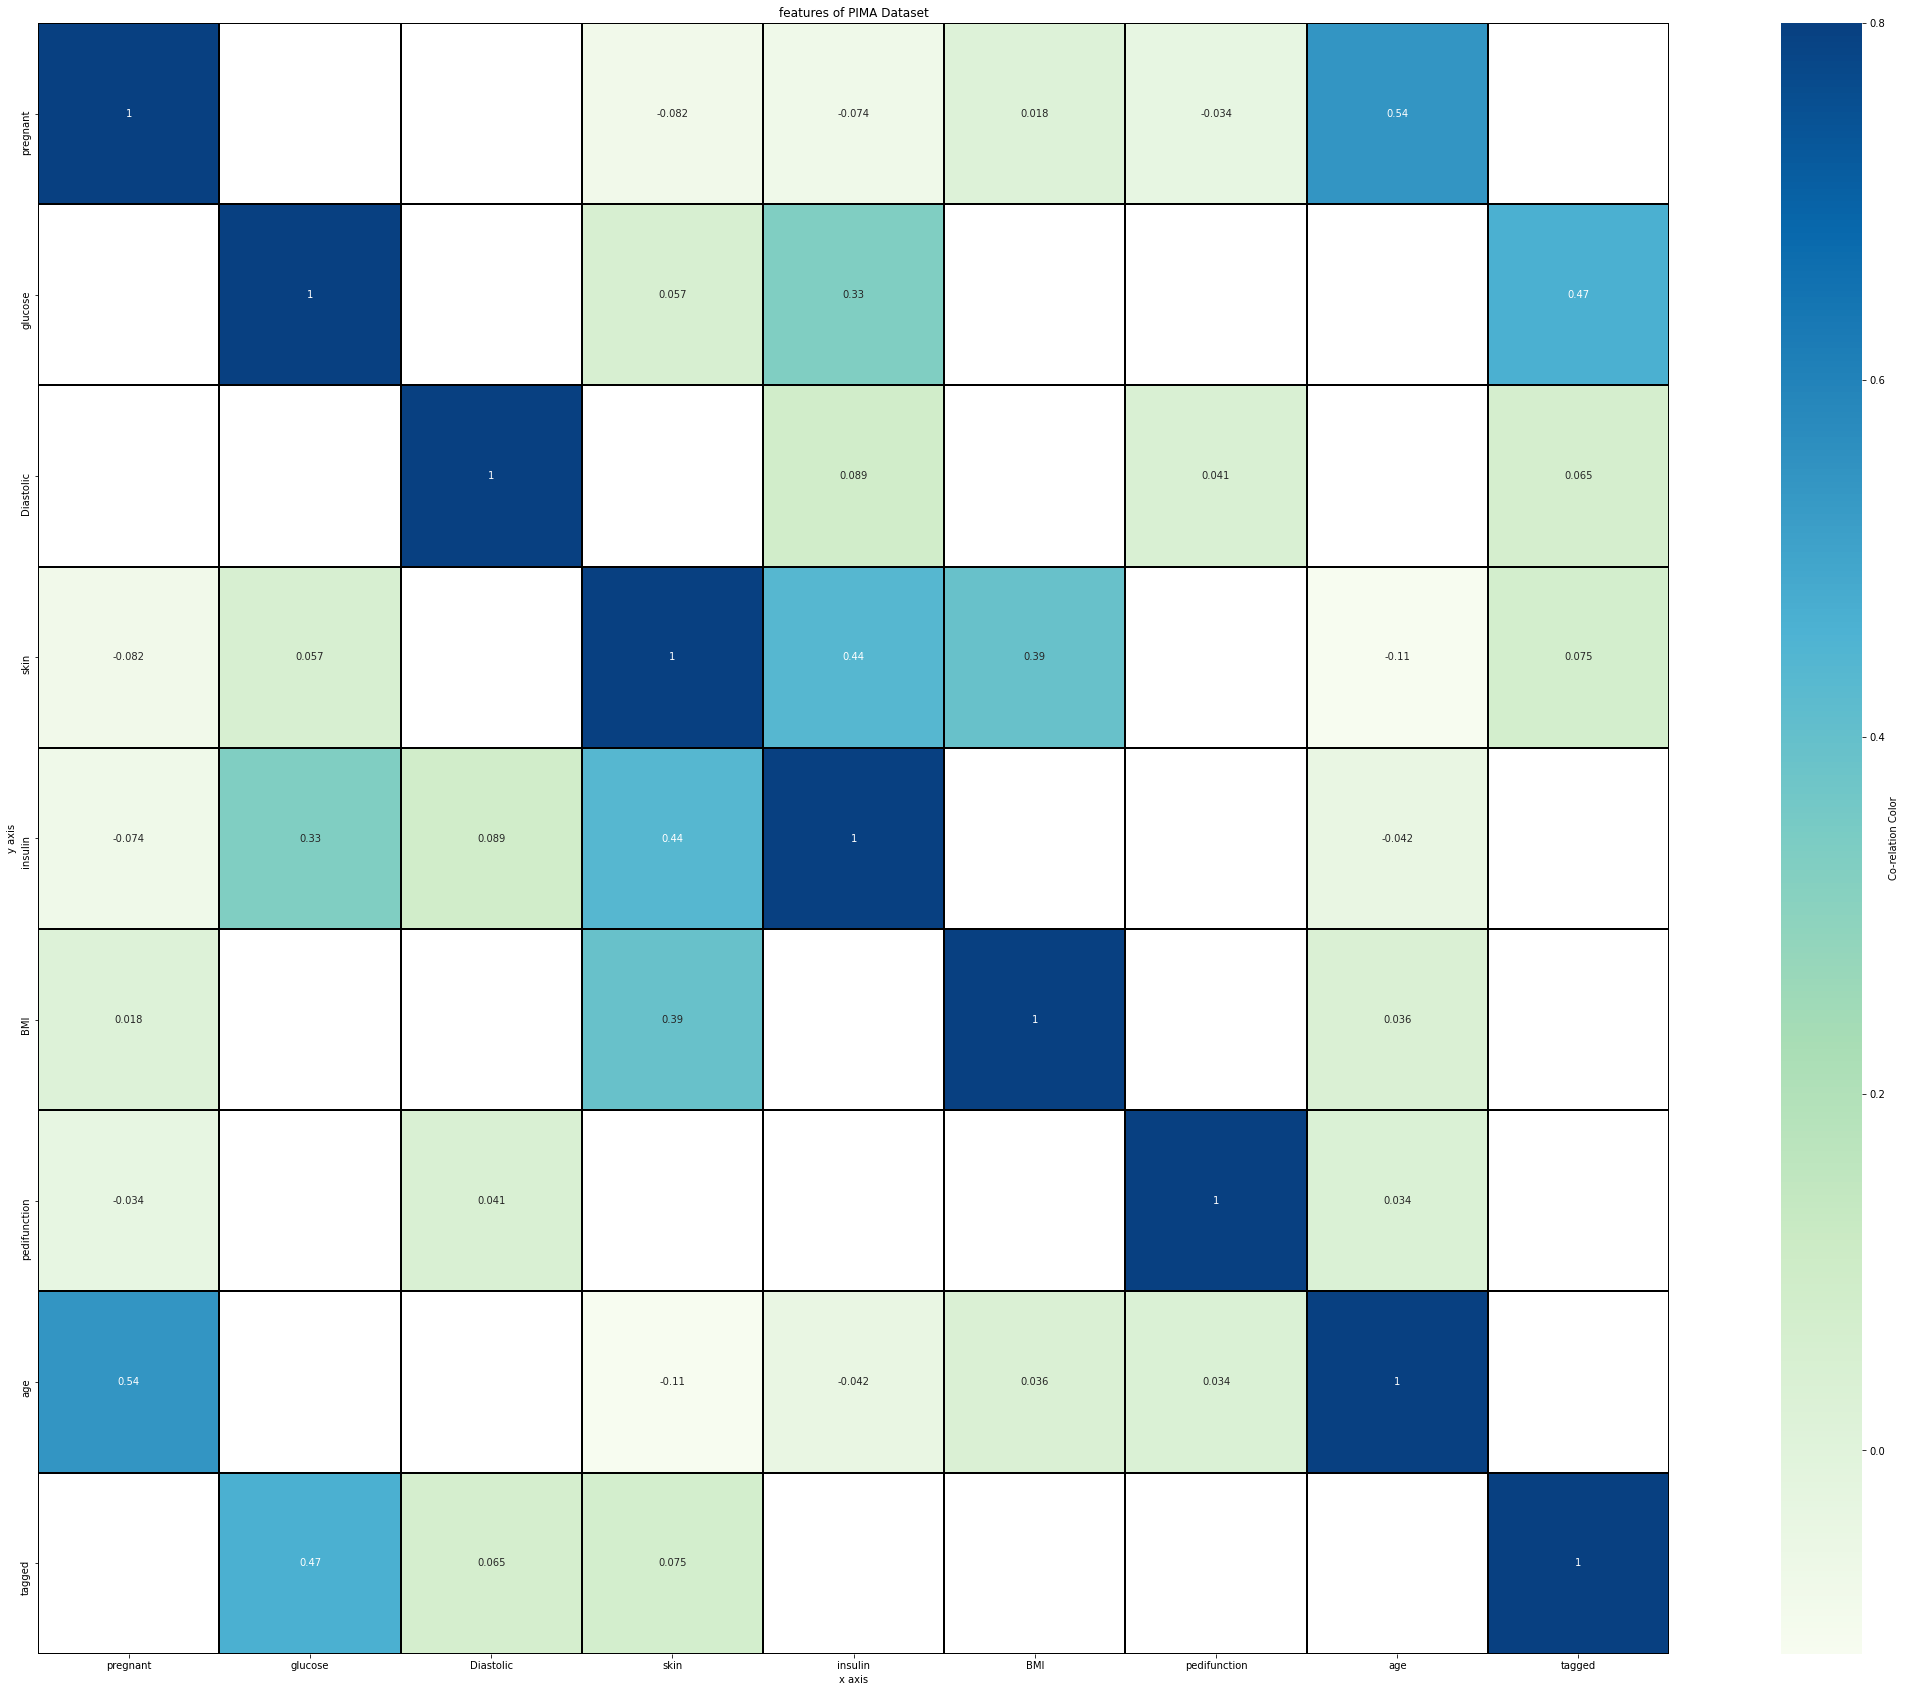

In [78]:
corr = database.corr()
mplt.figure(figsize=(40, 30))
co_range = corr[(corr >= 0.3)| (corr <=0.1)]
sns.heatmap(co_range, vmax=.8, linewidths=0.01, square=True, annot=True, cmap='GnBu', linecolor='black', cbar_kws={'label':'Co-relation Color'})
mplt.title('features of PIMA Dataset')
mplt.xlabel('x axis')
mplt.ylabel('y axis')